# Warawa Local Govt Area Data

In this notebook, we'll be working with the cleaned data for Warawa, South Kano.

### Loading Data

In [ ]:
warawa_path = 'https://raw.githubusercontent.com/ashwinsingh7/Omdena-Smart-Agri-Using-AI-in-Kano-Nigeria/refs/heads/main/Warawa_South_Kano_cleaned.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(warawa_path)

### Inspecting Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            4018 non-null   int64  
 1   LGA Name                              4018 non-null   object 
 2   Sub-Region                            4018 non-null   object 
 3   Latitude                              4018 non-null   float64
 4   Longitude                             4018 non-null   float64
 5   Date                                  4018 non-null   object 
 6   YEAR                                  4018 non-null   int64  
 7   DOY                                   4018 non-null   int64  
 8   Temperature_at_2_Meters_Average_(C)   4018 non-null   float64
 9   Temperature_at_2_Meters_Maximum_(C)   4018 non-null   float64
 10  Temperature_at_2_Meters_Minimum_(C)   4018 non-null   float64
 11  Relative_Humidity

In [ ]:
df.head()

,Unnamed: 0,LGA Name,Sub-Region,Latitude,Longitude,Date,YEAR,DOY,Temperature_at_2_Meters_Average_(C),Temperature_at_2_Meters_Maximum_(C),Temperature_at_2_Meters_Minimum_(C),Relative_Humidity_at_2_Meters_(%),Precipitation_Corrected_(mm/day),Wind_Speed_at_2_Meters_Average_(m/s),Wind_Speed_at_2_Meters_Maximum_(m/s),Wind_Speed_at_2_Meters_Minimum_(m/s),Wind_Direction_at_2_Meters_(Degrees),Surface_Soil_Wetness_(1),Root_Zone_Soil_Wetness_(1),Profile_Soil_Moisture_(1)
0,0,Warawa,Southern,11.9067,8.7724,2014-01-01,2014,1,19.92,31.58,10.23,18.48,0.0,0.90,1.70,0.50,39.4,0.19,0.24,0.26
1,1,Warawa,Southern,11.9067,8.7724,2014-01-02,2014,2,20.21,29.80,12.59,15.86,0.0,1.07,1.85,0.62,43.7,0.19,0.24,0.26
2,2,Warawa,Southern,11.9067,8.7724,2014-01-03,2014,3,20.56,30.12,12.44,16.93,0.0,1.33,2.46,0.76,45.2,0.18,0.24,0.26
3,3,Warawa,Southern,11.9067,8.7724,2014-01-04,2014,4,20.51,30.72,12.47,19.74,0.0,1.34,2.46,0.72,52.8,0.18,0.24,0.26
4,4,Warawa,Southern,11.9067,8.7724,2014-01-05,2014,5,20.17,29.41,12.13,22.80,0.0,1.23,2.10,0.65,55.0,0.18,0.24,0.26


In [ ]:
# data type of Date column

print(df['Date'].dtype)


object


Changing Date to datetime type

In [ ]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Print the data type again to verify the conversion
print(df['Date'].dtype)


datetime64[ns]


### Map Visualisation

In [ ]:
import folium

# Create a map centered at an average location
m = folium.Map(location=[12.0, 8.5167], zoom_start=5)  # Change to your region

# List of coordinates (latitude, longitude, name)
locations = [(11.9067,8.7724,'Warawa')]

# Add markers to the map
for lat, lon, name in locations:
    folium.Marker(location=[lat, lon], popup=name, tooltip=name).add_to(m)

# Display the map directly in the notebook (no HTML file needed)
m

# Crop Windows Based on Analysis of Historical Rainfall and Soil Moisture Patterns

##Expert Recommendation

**Recommendations by Mr. Abubakar Aliyu**

<br>

Mr. Abubakar Aliyu [(LinkedIn)](https://www.linkedin.com/in/abubakaraliyu1559/), a Nigerian agricultural innovator with deep knowledge of local farming practices, emphasises that effective planting decisions in Northern Nigeria depend on a combination of environmental factors, particularly soil moisture, rainfall patterns, and temperature. He recommends prioritising soil moisture at planting depth (**5–10 cm)** as the primary target variable for model development, noting that farmers often manually assess soil conditions by digging and checking moisture levels directly.

This depth corresponds with ***Surface Soil Wetness*** in our data which, as per NASA’s description, captures the water and water vapour in the upper 5 cm of soil. We also have ***Root Zone Soil Wetness*** in our data but that captures the water content of the upper 200 cm so it may be too deep; nevertheless, it can also be looked at to more comprehensively ascertain the amount of water accessible to the crops for absorption.

<br>

A threshold **soil moisture** value of **0.3–0.4** is suggested as a practical decision point for planting, with crop-specific ranges provided: 0.3–0.6 for millet, 0.4–0.7 for maize, and 0.3–0.5 for cowpea.


For **rainfall assessment**, he suggests a 10-day rolling rainfall window, capturing the cumulative precipitation over the past 10 days to smooth out noise from isolated showers.

This approach better reflects how soil absorbs water and mirrors how local farmers track weather patterns. According to regional research (Ibrahim & Mohammed, 2023), the onset of the planting season typically coincides with 25–30 mm of rain over three consecutive days, followed by a continued absence of dry spells.

This rainfall pattern reduces the likelihood of crop failure or replanting.

<br>

To make model outputs more interpretable and actionable, Mr. Aliyu recommends aligning rainfall classifications with locally recognized terminology:

- Ruwan Yayyafi (light showers, 1–10 mm/day): insufficient for planting, only moistens the soil surface.

- Ruwan Tsakiya (steady rain, 10–25 mm/day): may support planting if sustained, beneficial for established crops.

- Ruwan Gaske (heavy downpour, >25 mm/day): generally suitable for planting.

- Ruwan Ambaliya (flooding rain, >50 mm/day): poses risk of waterlogging and damage to seedlings.

<br>

To bridge technical predictions with practical decisions, he suggests introducing a Planting Readiness Index, a five-level scale that integrates rainfall and soil moisture data:

1.	Not Ready – dry soil, no rainfall trend
2.	Watch – initial signs, soil starting to moisten
3.	Prepare – improving conditions, ready seeds
4.	Plant – optimal soil moisture and rainfall conditions
5.	Caution – potential risks due to excessive wetness or forecasted dry spells


This approach ensures that our recommendations remain closely tied to the realities of local agricultural decision-making and are communicated in a form that is readily understandable and usable by the farming communities.








##Rainfall Categorisation

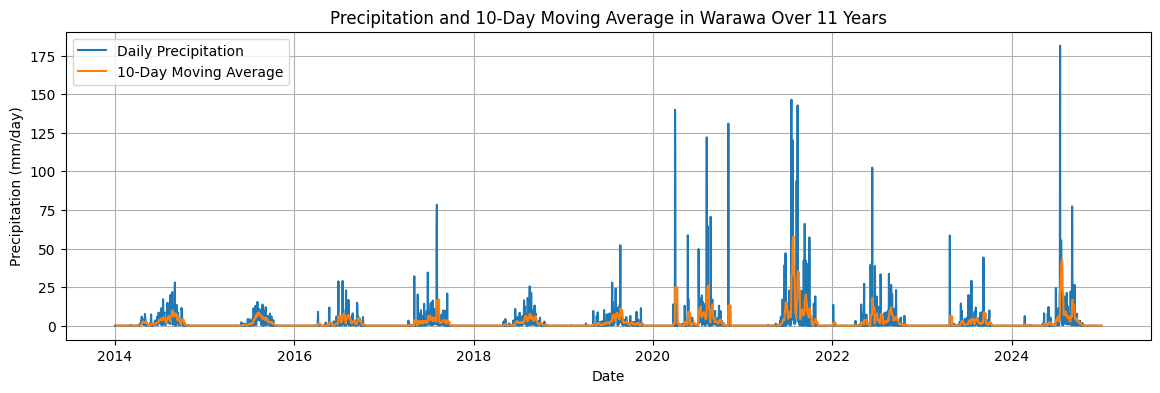

In [ ]:
#plot a moving average with a 10 day window for precipitation across all 11 years

import matplotlib.pyplot as plt

# Calculate the 10-day moving average of precipitation
df['Precipitation_MA_10'] = df['Precipitation_Corrected_(mm/day)'].rolling(window=10).mean()

# Plot the precipitation and its 10-day moving average
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['Precipitation_Corrected_(mm/day)'], label='Daily Precipitation')
plt.plot(df['Date'], df['Precipitation_MA_10'], label='10-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm/day)')
plt.title('Precipitation and 10-Day Moving Average in Warawa Over 11 Years')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-9-1f20f6566bc2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['Precipitation_MA_10'] = year_df['Precipitation_Corrected_(mm/day)'].rolling(window=10).mean()


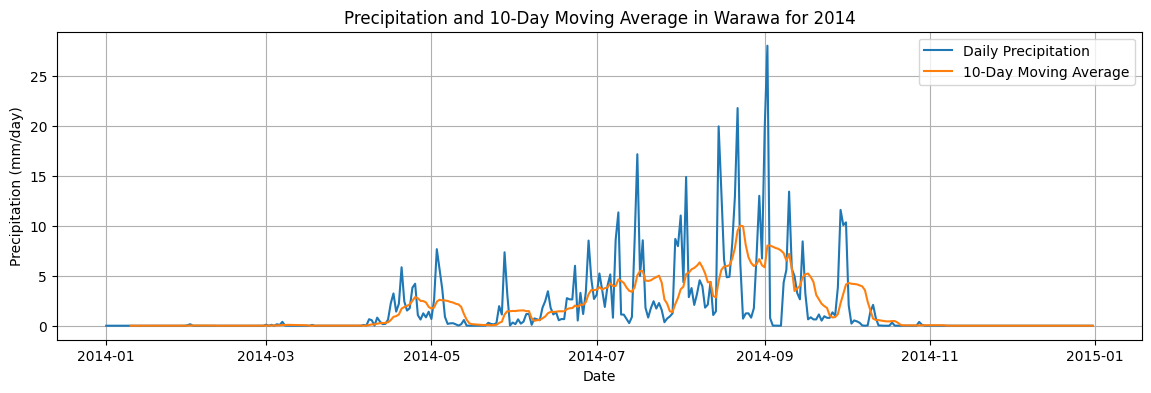

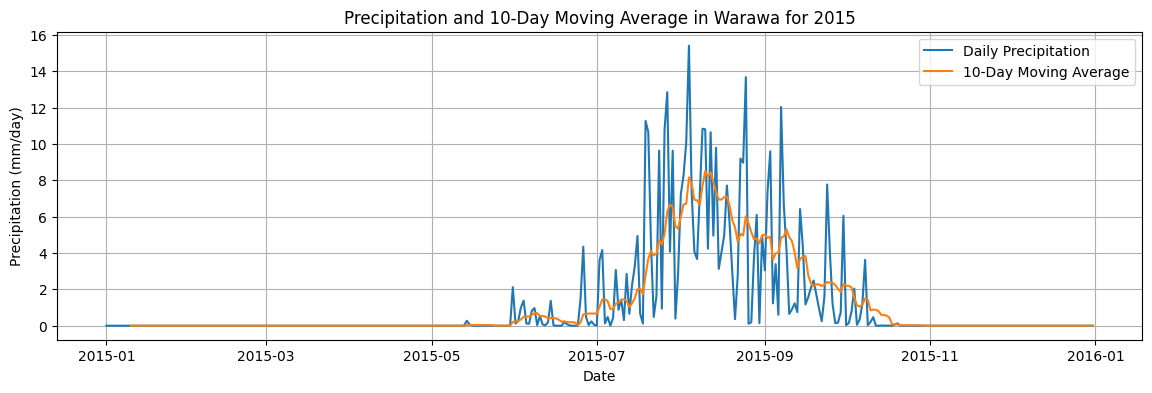

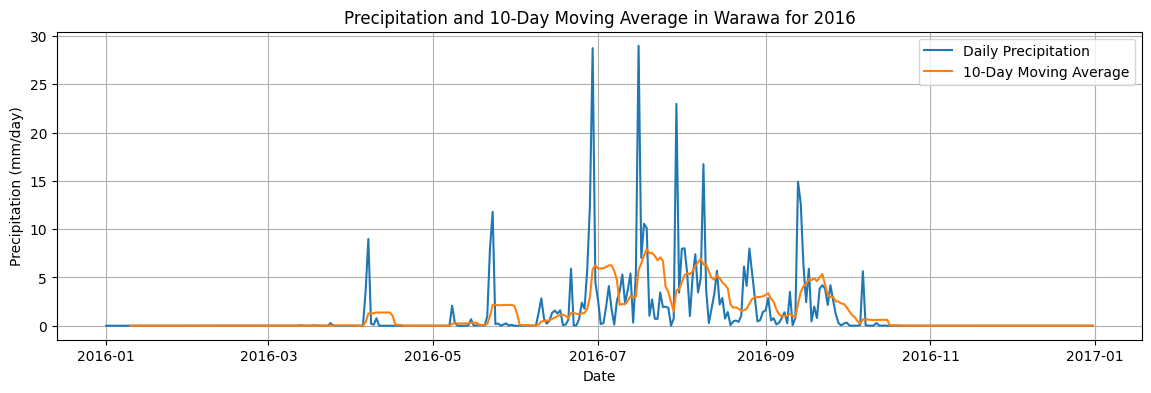

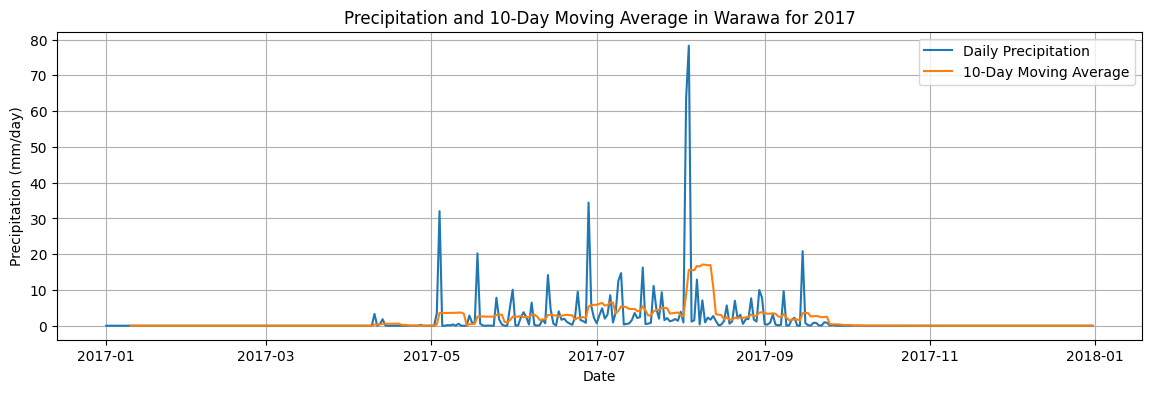

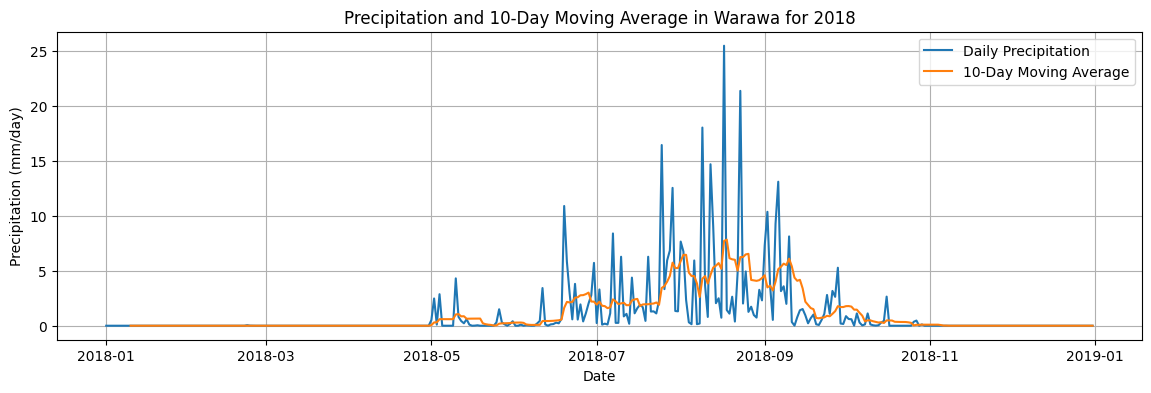

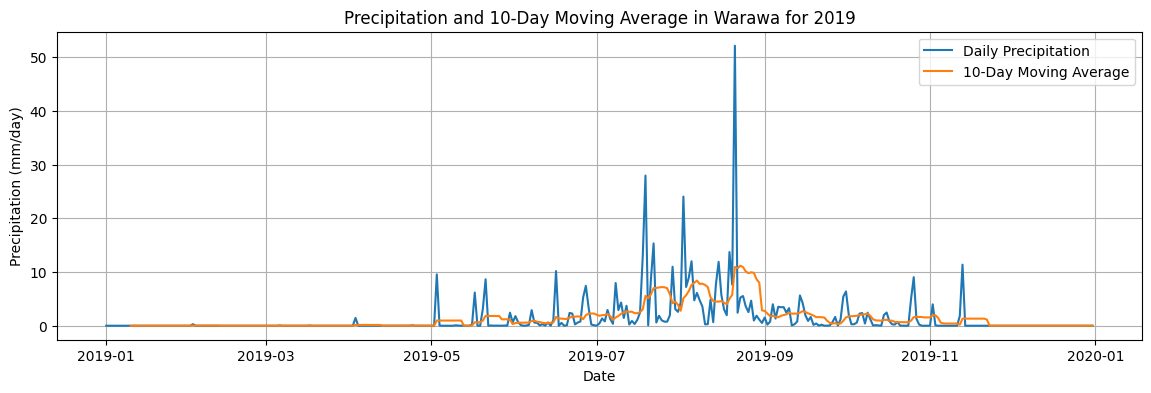

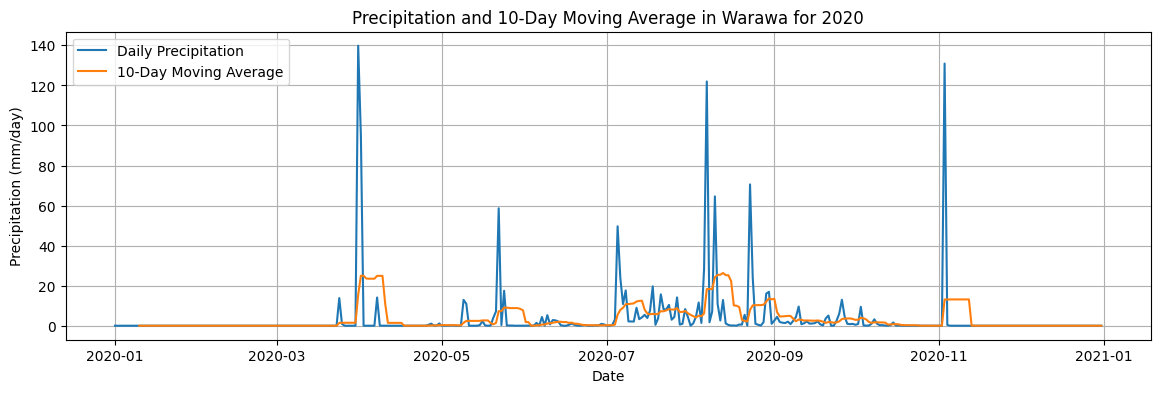

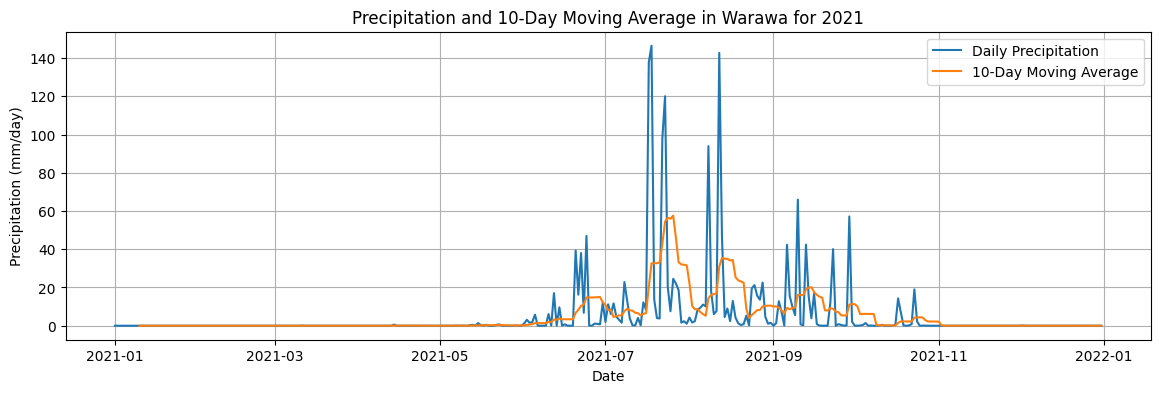

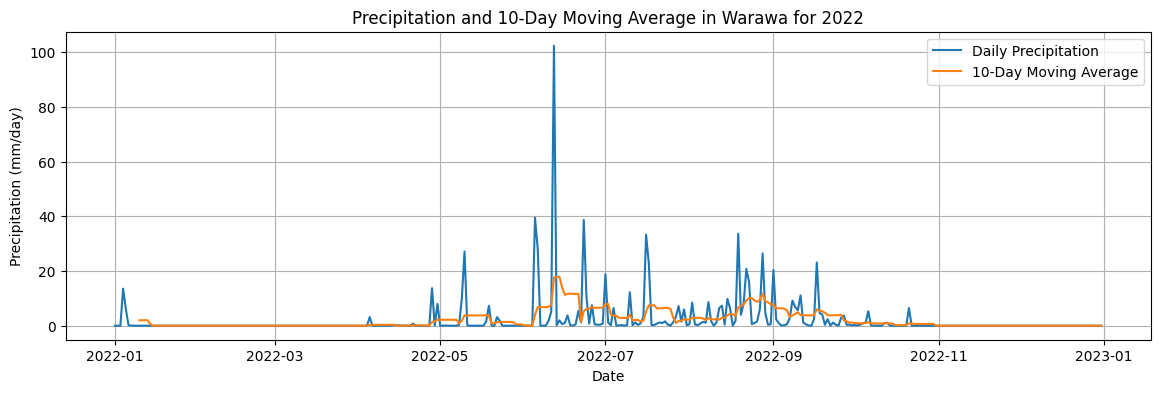

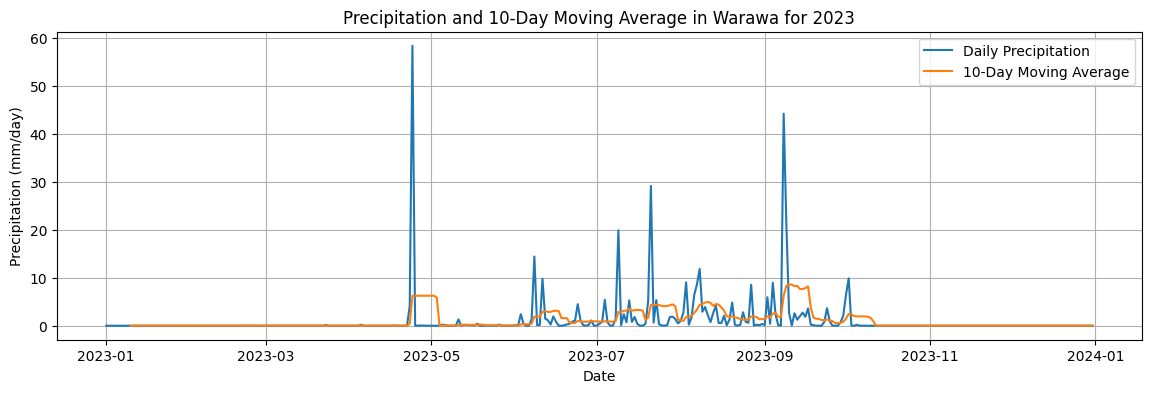

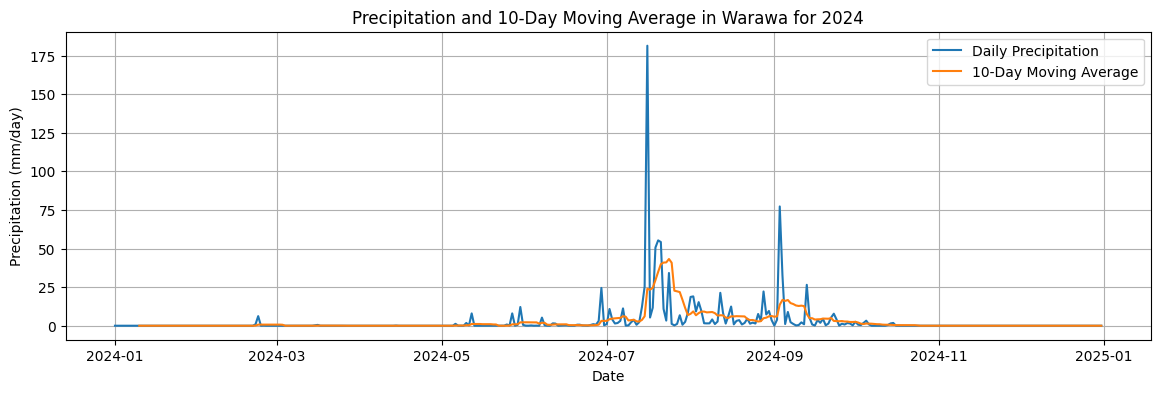

In [ ]:
# separate plots for each year showing precipitation vs moving avg

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'warawa_df' and has a 'Date' column and 'Precipitation_Corrected_(mm/day)' column
# Replace 'warawa_df' with your actual DataFrame name if it's different

# Loop through unique years in the DataFrame
for year in df['Date'].dt.year.unique():
    # Filter the DataFrame for the current year
    year_df = df[df['Date'].dt.year == year]

    # Calculate the 10-day moving average of precipitation for the current year
    year_df['Precipitation_MA_10'] = year_df['Precipitation_Corrected_(mm/day)'].rolling(window=10).mean()

    # Create a separate plot for the current year
    plt.figure(figsize=(14, 4))
    plt.plot(year_df['Date'], year_df['Precipitation_Corrected_(mm/day)'], label='Daily Precipitation')
    plt.plot(year_df['Date'], year_df['Precipitation_MA_10'], label='10-Day Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Precipitation (mm/day)')
    plt.title(f'Precipitation and 10-Day Moving Average in Warawa for {year}')
    plt.legend()
    plt.grid(True)
    plt.show()


As can be seen from the plots above, there's considerable variation in the rainfall pattern from one year to the next.

In [ ]:
df['Precipitation_MA_10'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4018 entries, 0 to 4017
Series name: Precipitation_MA_10
Non-Null Count  Dtype  
--------------  -----  
4009 non-null   float64
dtypes: float64(1)
memory usage: 31.5 KB


In [ ]:
#make nan values in 10 day MA column 0

df['Precipitation_MA_10'] = df['Precipitation_MA_10'].fillna(0)

df['Precipitation_MA_10'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4018 entries, 0 to 4017
Series name: Precipitation_MA_10
Non-Null Count  Dtype  
--------------  -----  
4018 non-null   float64
dtypes: float64(1)
memory usage: 31.5 KB


In [ ]:
# add a column for shower category with the following classification based on 'Precipitation_MA_10' values: 1-10 mm/day - light showers ; 1--25 mm/day - moderate showers ; 25-50 mm/day - heavy showers ; >50 mm/day - flooding rain

import matplotlib.pyplot as plt
# Create a new column 'Shower Category' based on 'Precipitation_MA_10'
def categorize_showers(precipitation):
    if precipitation <= 1:
        return 'negligible rain'
    elif 1 < precipitation <= 10:
        return 'light rain'
    elif 10 < precipitation <= 25:
        return 'moderate rain'
    elif 25 < precipitation <= 50:
        return 'heavy rain'
    else:
        return 'flooding rain'

df['Shower Category'] = df['Precipitation_MA_10'].apply(categorize_showers)

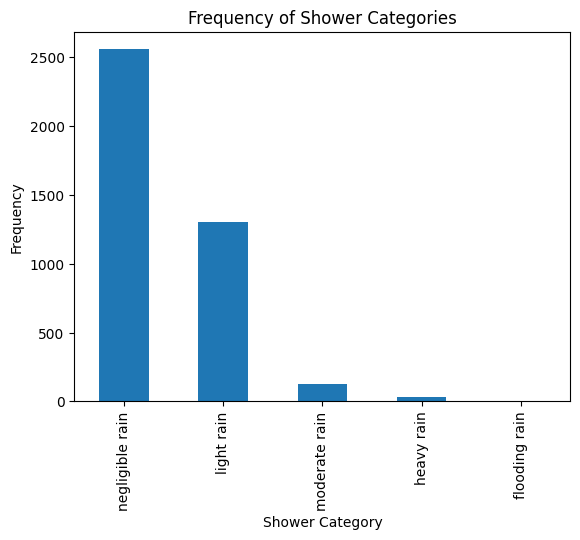

,count
Shower Category,
negligible rain,2554
light rain,1301
moderate rain,130
heavy rain,29
flooding rain,4


In [ ]:
# visualise df['Shower Category'].value_counts()

import matplotlib.pyplot as plt
df['Shower Category'].value_counts().plot(kind='bar')
plt.xlabel('Shower Category')
plt.ylabel('Frequency')
plt.title('Frequency of Shower Categories')
plt.show()

df['Shower Category'].value_counts()

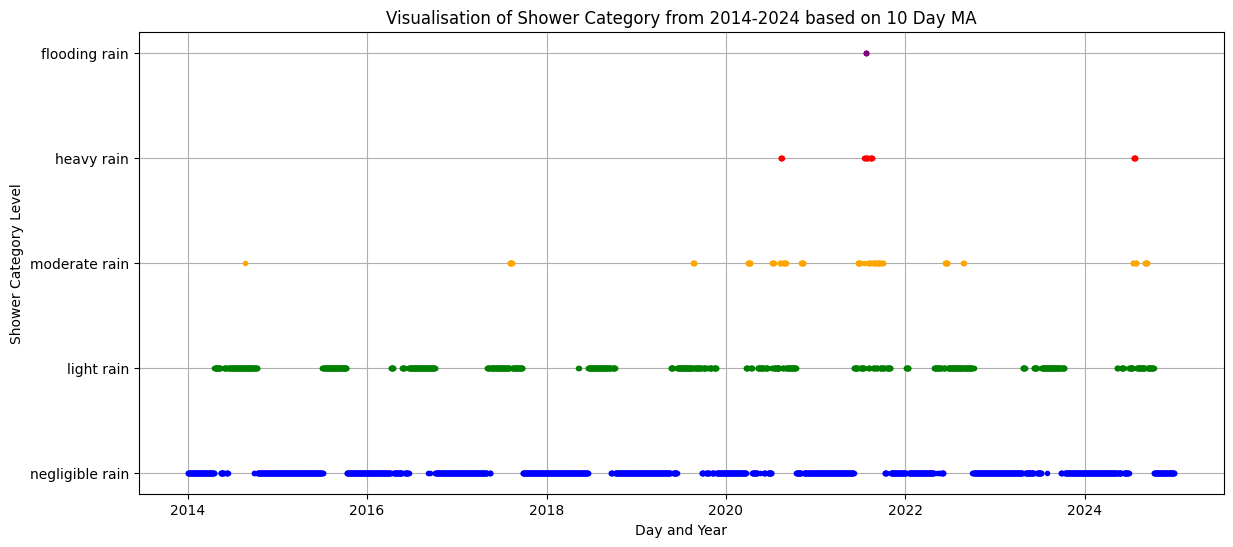

In [ ]:
# visualise shower category over time

import pandas as pd
import matplotlib.pyplot as plt


# Create a dictionary to map shower categories to colors and y-axis levels
category_mapping = {
    'negligible rain': ('blue', 1),
    'light rain': ('green', 2),
    'moderate rain': ('orange', 3),
    'heavy rain': ('red', 4),
    'flooding rain': ('purple', 5)
}

# Create the plot
plt.figure(figsize=(14, 6))

# Iterate through the DataFrame and plot a dot for each row
for index, row in df.iterrows():
    category = row['Shower Category']
    if category in category_mapping:
        color, level = category_mapping[category]
        plt.plot(row['Date'], level, '.', color=color)

plt.xlabel('Day and Year')
plt.ylabel('Shower Category Level')
plt.title('Visualisation of Shower Category from 2014-2024 based on 10 Day MA')
plt.yticks(list(range(1, 6)), list(category_mapping.keys()))  # Set y-axis ticks to shower categories
plt.grid(True)
plt.show()


In [ ]:
# create a series of the possible amount of rainfall on each day based on 10 day moving average


import pandas as pd
# Assuming 'warawa_df' is your DataFrame with 'Date' and 'Shower Category' columns.

# Convert 'Date' to datetime if it's not already.
df['Date'] = pd.to_datetime(df['Date'])

# Create an empty series with the day of the year as the index.
rain_series = pd.Series(index=pd.date_range('2014-01-01', '2014-12-31').dayofyear, dtype=str)

# Iterate through each year's data to identify rain occurrences and update the series.
for year in range(2014, 2025):
  yearly_df = df[df['Date'].dt.year == year]
  for day in range(1, 367):
    daily_data = yearly_df[yearly_df['Date'].dt.dayofyear == day]
    if not daily_data.empty:
      # Check if flooding rain has been observed on this day.
      if 'flooding rain' in daily_data['Shower Category'].values:
        rain_series.loc[day] = 'flooding rain'

      # Check if heavy rain has been observed 2 or more times on this day.
      elif 'heavy rain' in daily_data['Shower Category'].values:
        #rain_series.loc[day] = 'heavy rain'
        if rain_series.loc[day] != 'flooding rain':
          rain_series.loc[day] = 'heavy rain'

      # Check if moderate rain has been observed 3 or more times on this day.
      elif 'moderate rain' in daily_data['Shower Category'].values:
        if rain_series.loc[day] != 'flooding rain' and rain_series.loc[day] != 'heavy rain':
          rain_series.loc[day] = 'moderate rain'

      # Check if light rain has been observed 5 or more times on this day.
      elif 'light rain' in daily_data['Shower Category'].values:
        if rain_series.loc[day] != 'flooding rain' and rain_series.loc[day] != 'heavy rain' and rain_series.loc[day] != 'moderate rain':
          rain_series.loc[day] = 'light rain'

# Fill any remaining NaN values with 'no rain'.
rain_series = rain_series.fillna('no rain')

# Print the series.
rain_series.value_counts()


,count
light rain,136
no rain,114
moderate rain,94
heavy rain,17
flooding rain,4


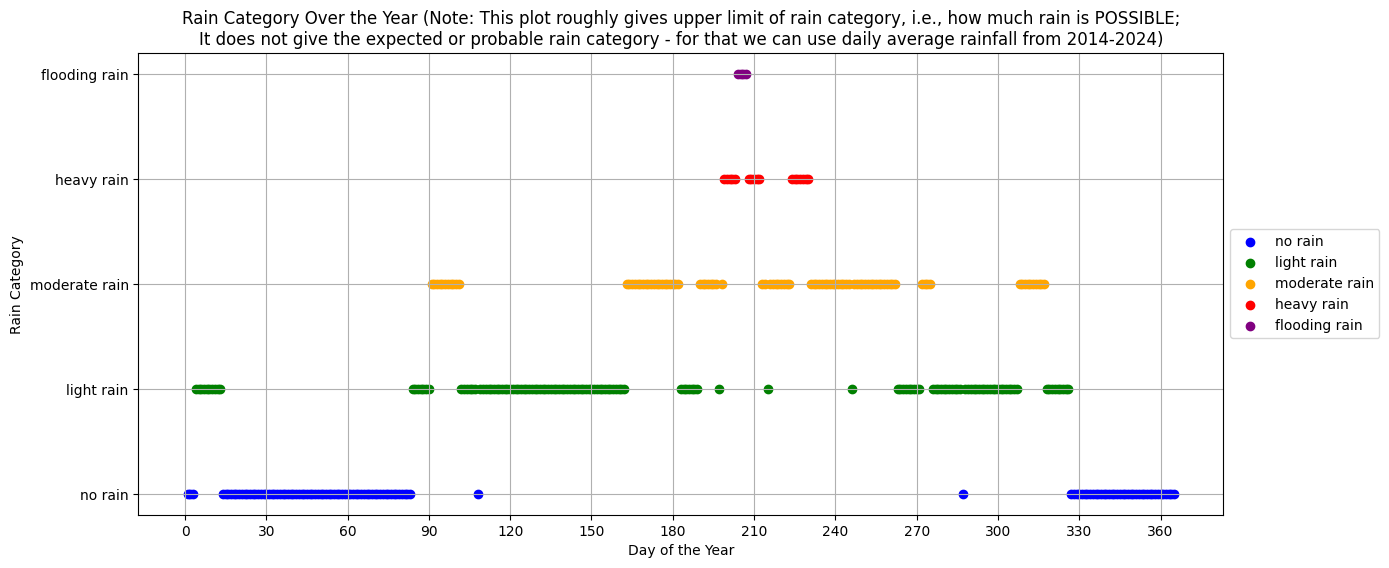

In [ ]:
# visualise rain_series with diffferent coloured dots at different heights, add index

import matplotlib.pyplot as plt

# Assuming rain_series is defined as in your previous code

plt.figure(figsize=(14, 6))

# Define colors for different rain categories
colors = {'no rain': 'blue', 'light rain': 'green', 'moderate rain': 'orange', 'heavy rain': 'red', 'flooding rain': 'purple'}

# Iterate through the rain_series and plot dots with different colors and heights based on the category
for day, category in rain_series.items():
  y_value = 0  # Default y-value for 'no rain'
  if category == 'light rain':
    y_value = 1
  elif category == 'moderate rain':
    y_value = 2
  elif category == 'heavy rain':
    y_value = 3
  elif category == 'flooding rain':
    y_value = 4
  plt.scatter(day, y_value, color=colors[category], label=category if category not in [x.get_label() for x in plt.gca().get_legend_handles_labels()[0]] else '_nolegend_')

# Add index (day of the year)
plt.xlabel('Day of the Year')
plt.ylabel('Rain Category')
plt.title('Rain Category Over the Year (Note: This plot roughly gives upper limit of rain category, i.e., how much rain is POSSIBLE;\nIt does not give the expected or probable rain category - for that we can use daily average rainfall from 2014-2024)')
plt.xticks(range(0, 367, 30)) # Adjust spacing of x-axis ticks as needed
plt.yticks([0,1,2,3,4], ['no rain', 'light rain', 'moderate rain', 'heavy rain', 'flooding rain'])
plt.grid(True)

# Move the legend outside the plot area
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

###POSSIBLE RAINFALL CATEGORIES AND AVERAGE RAINFALL

In [ ]:

# Group data by day of year and calculate the mean precipitation
#daily_avg_precip = df.groupby(df['Date'].dt.dayofyear)['Precipitation_Corrected_(mm/day)'].mean()

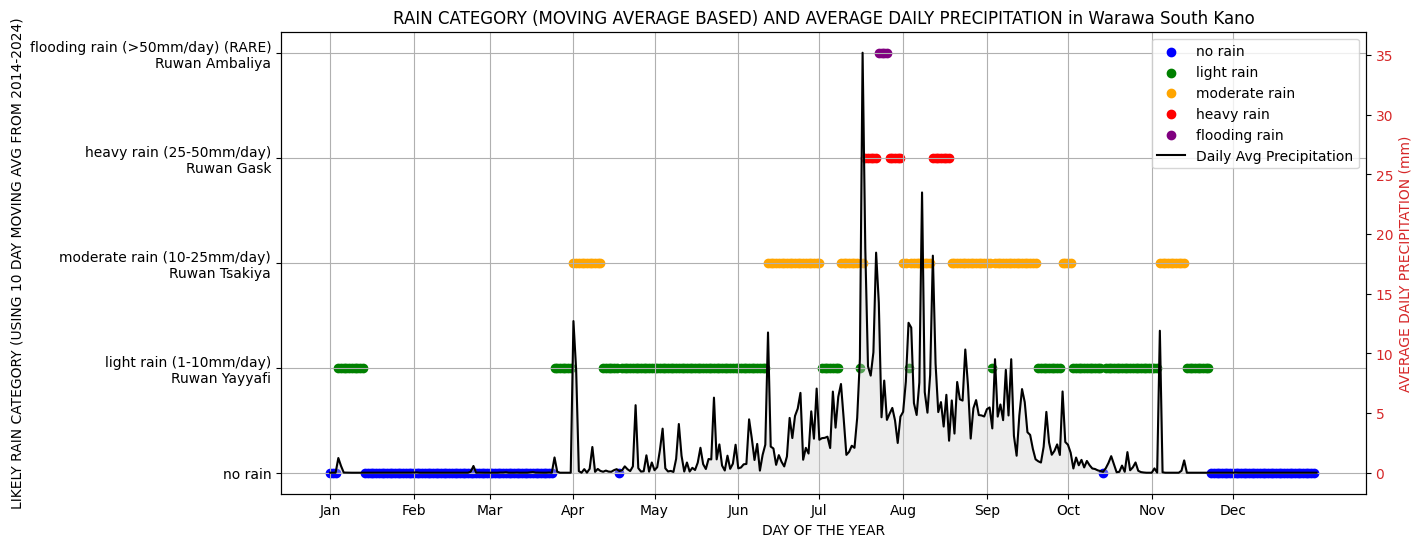

'\nplt.figure(figsize=(10, 5))\nplt.plot(daily_avg_precip)\n\nplt.tight_layout() # Adjust subplot parameters for a tight layout\nplt.show()\n'

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 6))

# Define colors for different rain categories
colors = {'no rain': 'blue', 'light rain': 'green', 'moderate rain': 'orange', 'heavy rain': 'red', 'flooding rain': 'purple'}

# Plot rain categories as scatter points
for day, category in rain_series.items():
    y_value = 0  # Default y-value for 'no rain'
    if category == 'light rain':
        y_value = 1
    elif category == 'moderate rain':
        y_value = 2
    elif category == 'heavy rain':
        y_value = 3
    elif category == 'flooding rain':
        y_value = 4
    plt.scatter(day, y_value, color=colors[category],
                label=category if category not in [x.get_label() for x in plt.gca().get_legend_handles_labels()[0]] else '_nolegend_')

ax1.set_xlabel('DAY OF THE YEAR')
ax1.set_ylabel('LIKELY RAIN CATEGORY (USING 10 DAY MOVING AVG FROM 2014-2024)')
ax1.set_title('RAIN CATEGORY (MOVING AVERAGE BASED) AND AVERAGE DAILY PRECIPITATION in Warawa South Kano')
ax1.set_xticks(range(0, 367, 30))
ax1.set_yticks([0,1,2,3,4], ['no rain', 'light rain (1-10mm/day)\nRuwan Yayyafi',
                             'moderate rain (10-25mm/day)\nRuwan Tsakiya',
                             'heavy rain (25-50mm/day)\nRuwan Gask',
                             'flooding rain (>50mm/day) (RARE)\nRuwan Ambaliya'])
ax1.grid(True)

# Group data by day of year and calculate the mean precipitation
daily_avg_precip = df.groupby(df['Date'].dt.dayofyear)['Precipitation_Corrected_(mm/day)'].mean()

# Create a second y-axis for daily precipitation values
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('AVERAGE DAILY PRECIPITATION (mm)', color=color)
line1, = ax2.plot(daily_avg_precip.index, daily_avg_precip.values, color='black', label='Daily Avg Precipitation')
ax2.fill_between(daily_avg_precip.index, daily_avg_precip.values, color='lightgrey', alpha=0.4)
ax2.tick_params(axis='y', labelcolor=color)

# Mean of 10-day moving average precipitation
#daily_ma_precip_avg = df.groupby(df['Date'].dt.dayofyear)['Precipitation_MA_10'].mean()
#line2, = ax2.plot(daily_ma_precip_avg.index, daily_ma_precip_avg.values, color='purple', label='Precipitation MA Daily Avg')

# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + [line1], labels1 + ['Daily Avg Precipitation'], #'Avg of 10 Day MA Precipitation'],
           loc='upper right', frameon=True)

# Customize x-axis to show months
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.set_xticks(month_ticks)
ax1.set_xticklabels(month_labels)

plt.show()

'''
plt.figure(figsize=(10, 5))
plt.plot(daily_avg_precip)

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()
'''

In the chart, the daily avg precipitation indicates the amount of rain that is expected or likely (based on historical data), while the rain categories roughly indicate the upper limit of how much rain is possible based on past moving average patterns.

<br>

Broadly, the rainfall patterns can be categorised as follows:


- Jan - negligible rain expected, light rain possible
- Feb - negligible rain expected
- Mar - negligible rain dxpected
- Apr - negligible rain expected, occasional light rain possible
- May - light rain expected
- Jun - light to moderate rain expected
- Jul - light to moderate rain expected, heavy rain possible
- Aug - light to moderate rain expected, heavy rain possible
- Sep - light rain expected, moderate rain possible
- Oct - light rain expected
- Nov - negligible rain expected, light rain possible
- Dec - negligible rain expected

<br>

However, as can be seen from the time series plots, there is **considerable variation** in the timing, duration and intensity of rainfall from one year to the next and there does not seem to be any predictable pattern in the variation. And so, we can only make broad recommendations that can be acted on by the farmers based on how the rainfall seems to be occuring for any given year.


##Soil Moisture Categorisation

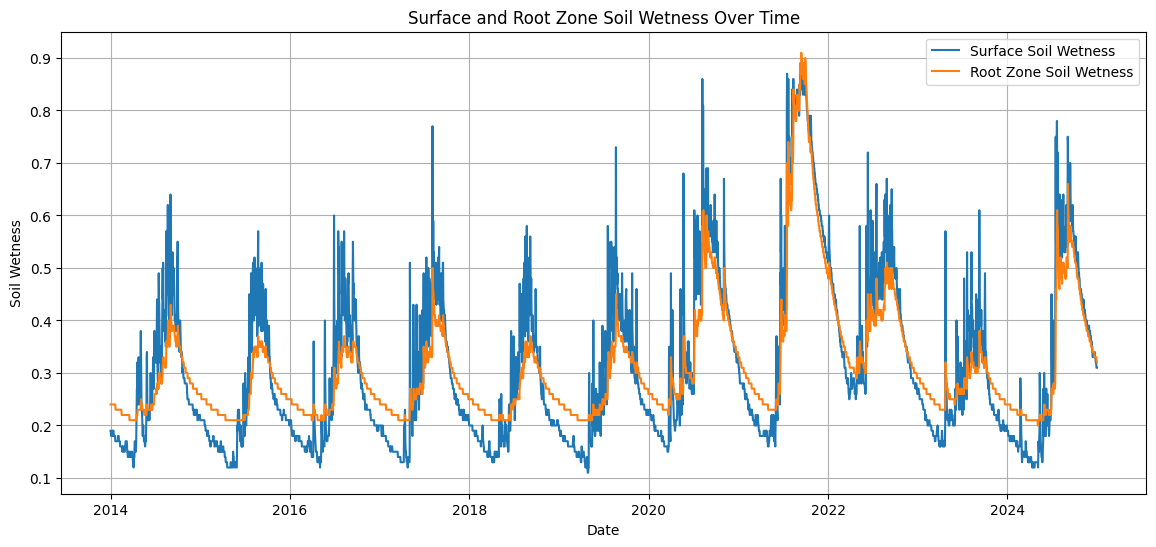

In [ ]:
# visualise time series for surface and root soil moisture Surface_Soil_Wetness_(1) in a single chart

import matplotlib.pyplot as plt
# Assuming you want to visualize 'Surface_Soil_Wetness_(1)' and 'Root_Zone_Soil_Wetness'
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Surface_Soil_Wetness_(1)'], label='Surface Soil Wetness')
plt.plot(df['Date'], df['Root_Zone_Soil_Wetness_(1)'], label='Root Zone Soil Wetness')
plt.xlabel('Date')
plt.ylabel('Soil Wetness')
plt.title('Surface and Root Zone Soil Wetness Over Time')
plt.legend()
plt.grid(True)
plt.show()


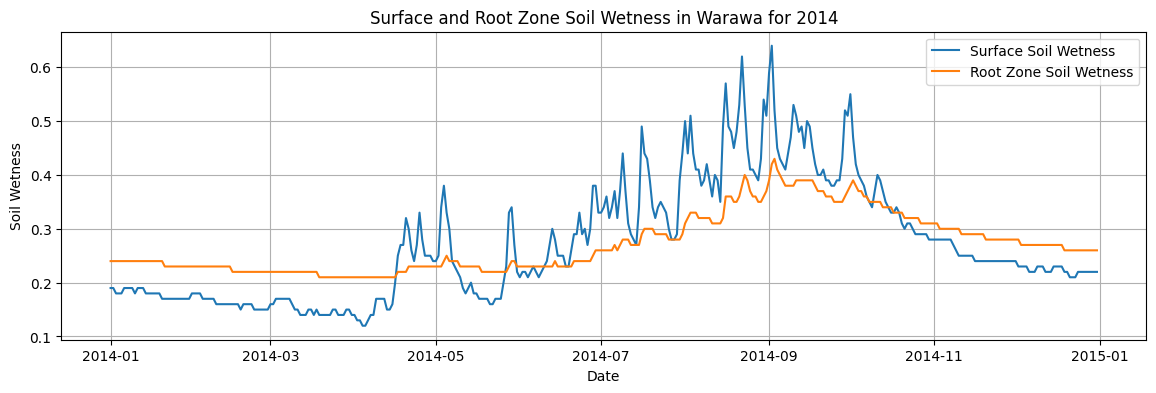

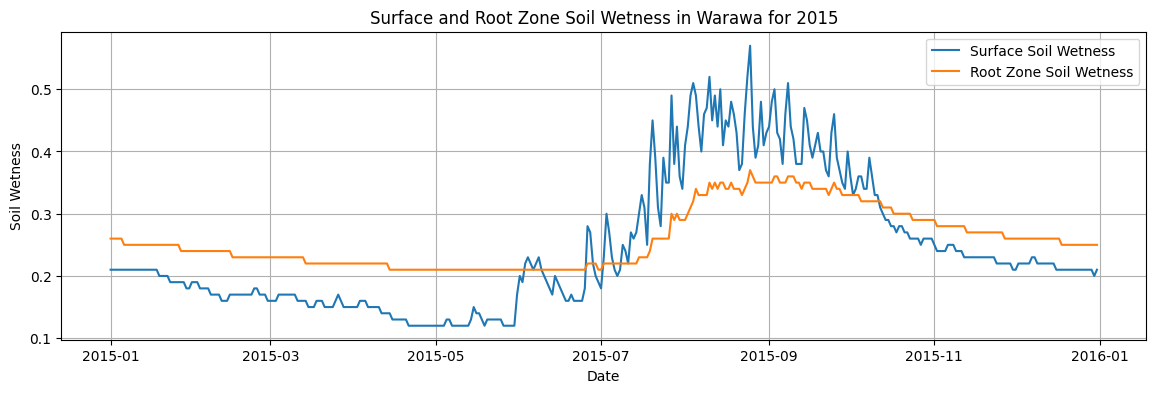

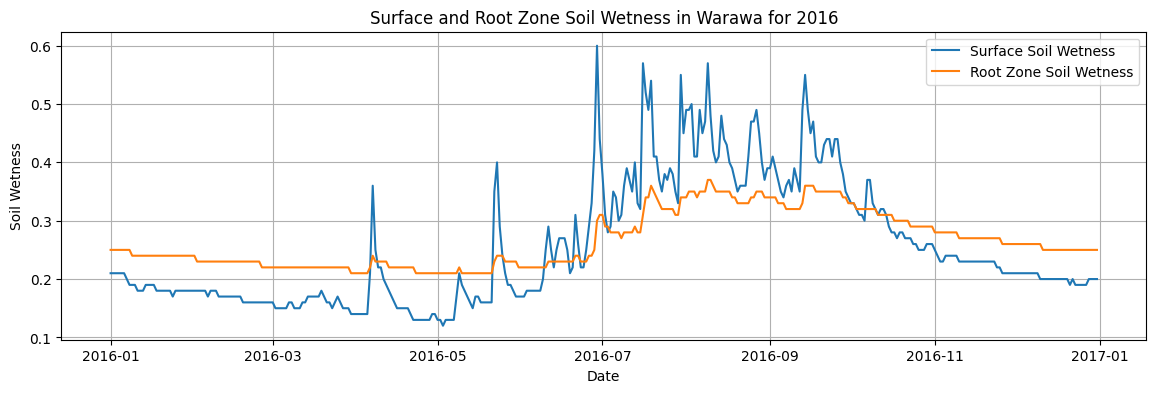

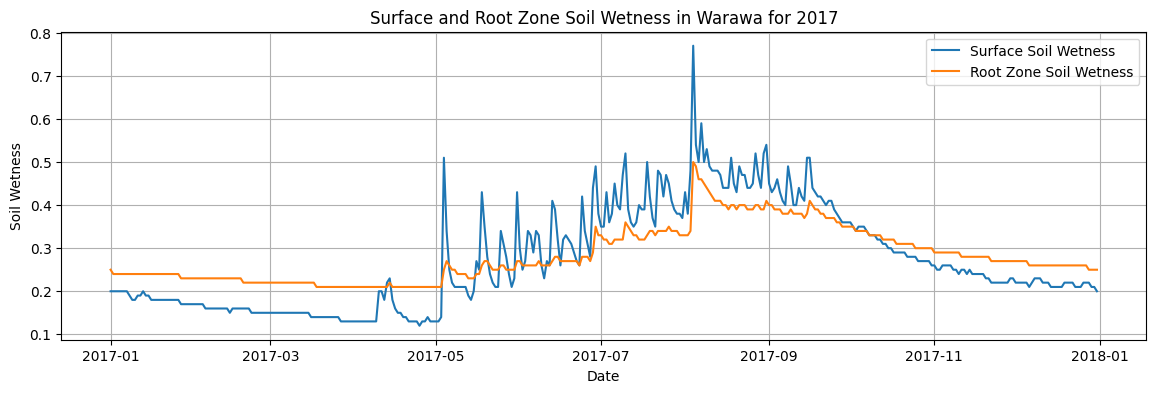

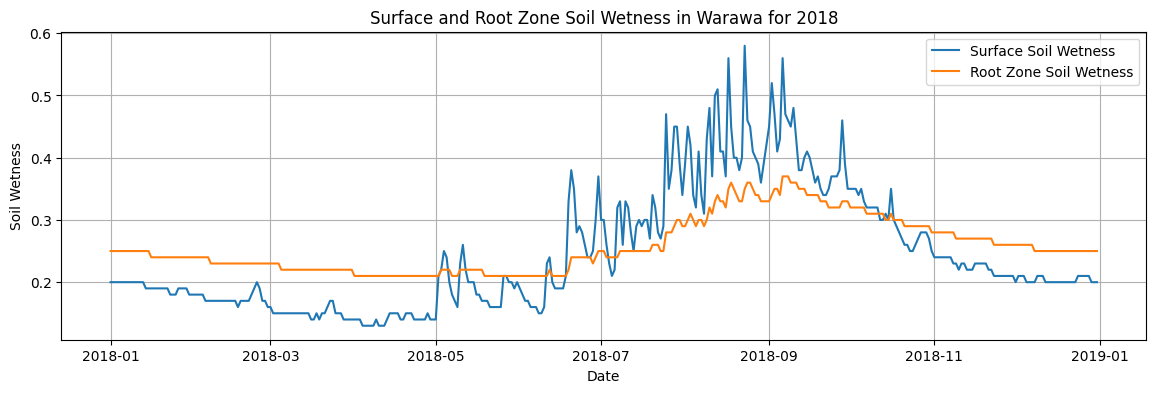

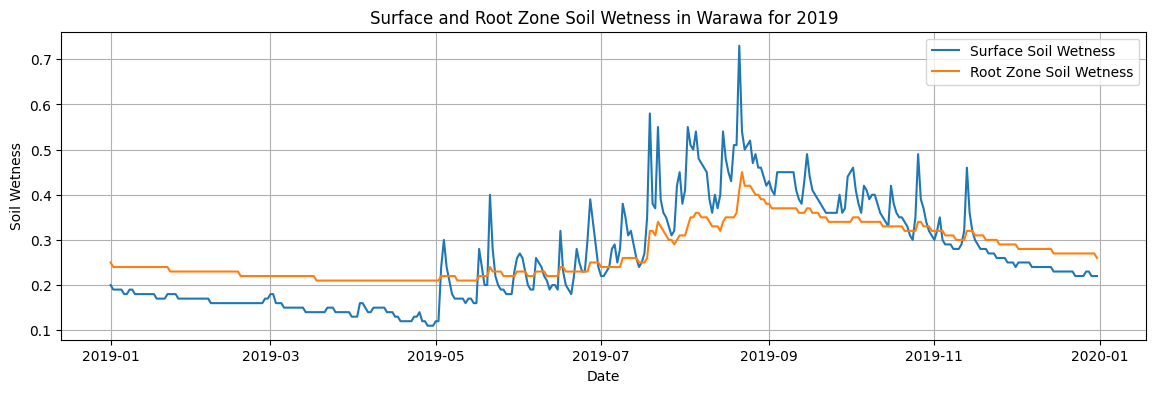

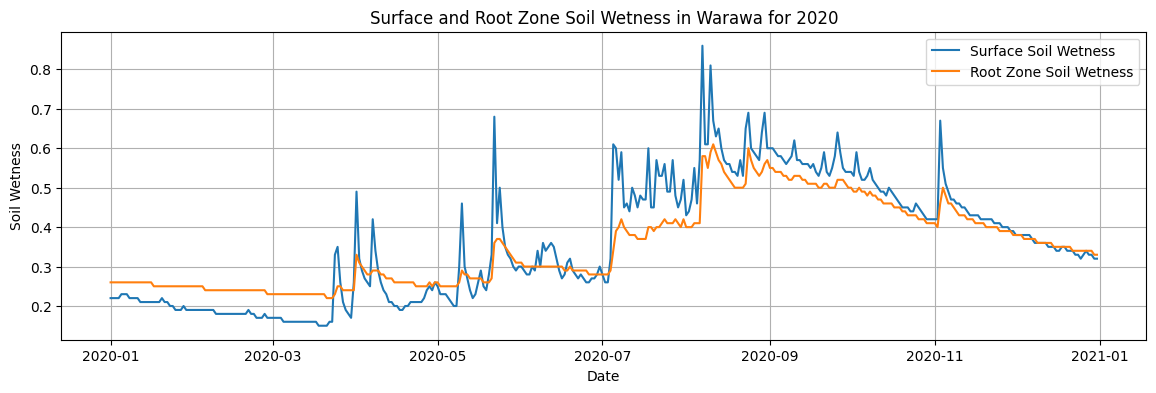

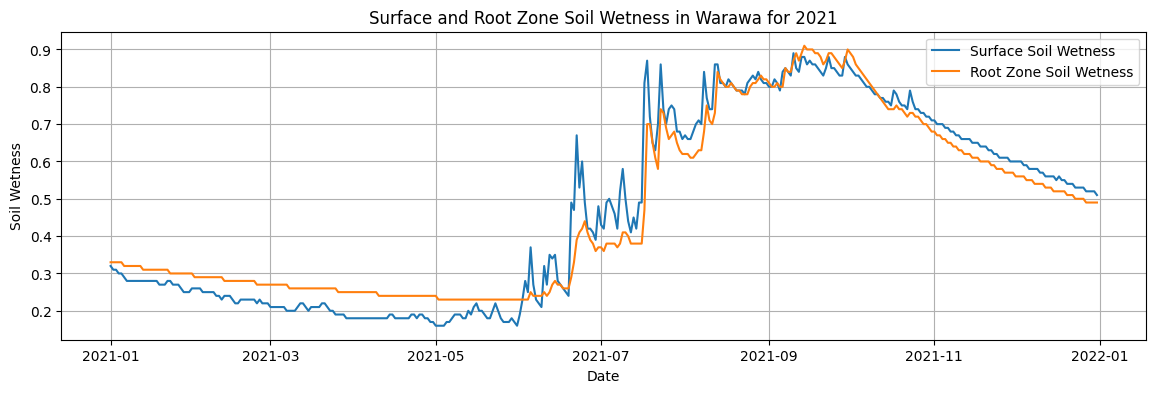

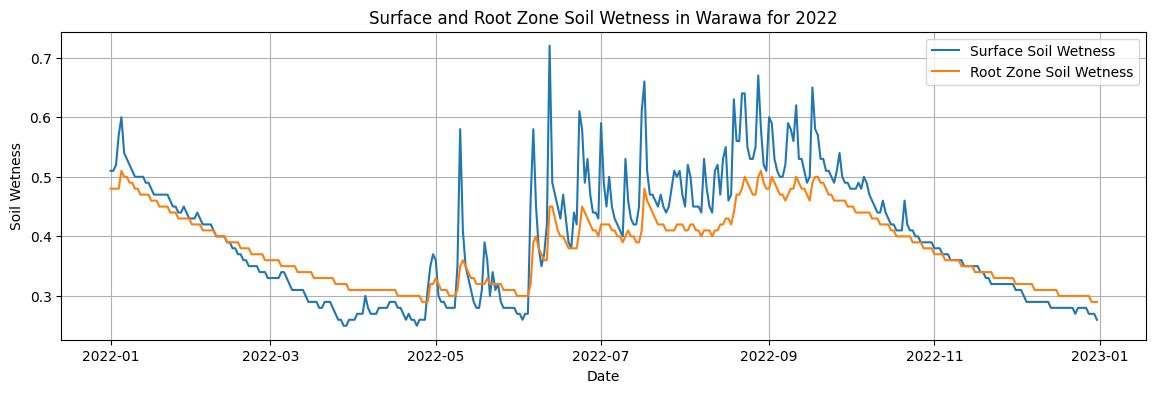

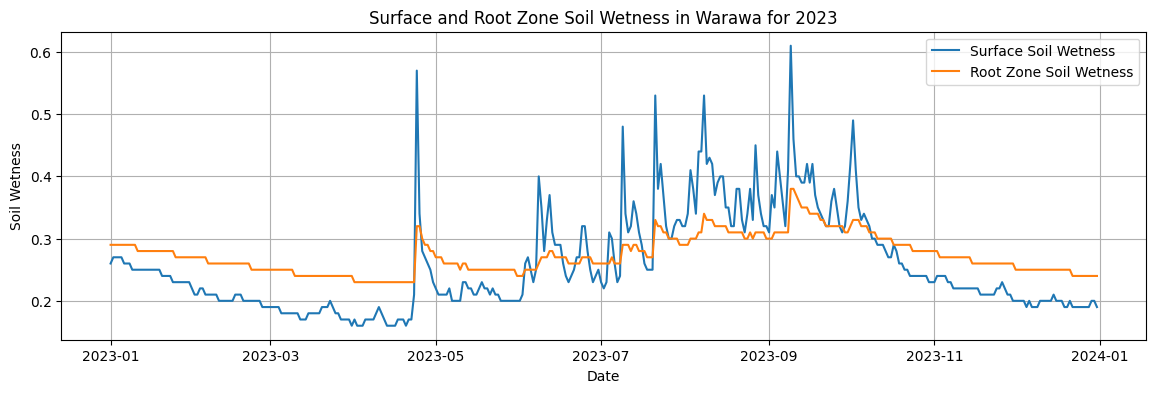

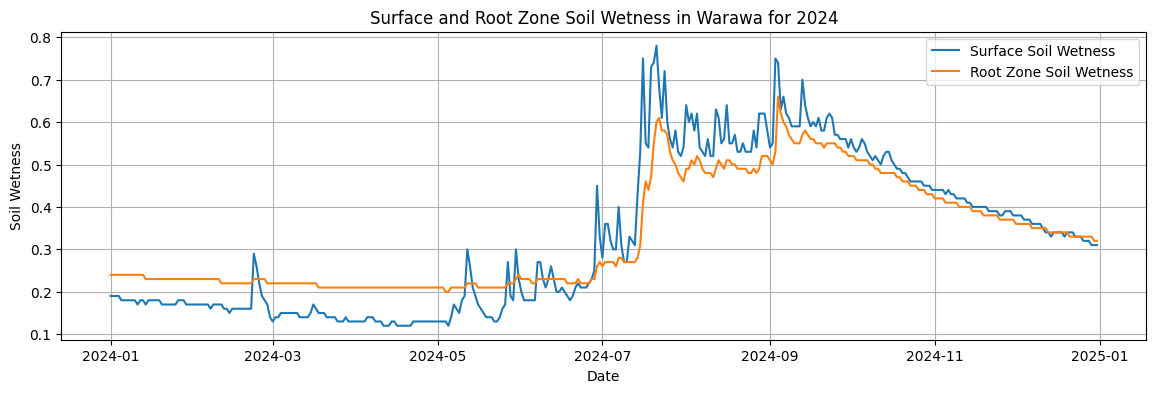

In [ ]:
# plot surface soil wetness and root zone soil wetness for each individual year

import matplotlib.pyplot as plt
# Assuming your DataFrame is named 'df' and has 'Date', 'Surface_Soil_Wetness_(1)', and 'Root_Zone_Soil_Wetness_(1)' columns.

# Loop through unique years in the DataFrame
for year in df['Date'].dt.year.unique():
    # Filter the DataFrame for the current year
    year_df = df[df['Date'].dt.year == year]

    # Create a separate plot for the current year
    plt.figure(figsize=(14, 4))
    plt.plot(year_df['Date'], year_df['Surface_Soil_Wetness_(1)'], label='Surface Soil Wetness')
    plt.plot(year_df['Date'], year_df['Root_Zone_Soil_Wetness_(1)'], label='Root Zone Soil Wetness')
    plt.xlabel('Date')
    plt.ylabel('Soil Wetness')
    plt.title(f'Surface and Root Zone Soil Wetness in Warawa for {year}')
    plt.legend()
    plt.grid(True)
    plt.show()


We consider surface level wetness and root zone soil moisture levels. Let us have a look at the daily average over the past 11 years

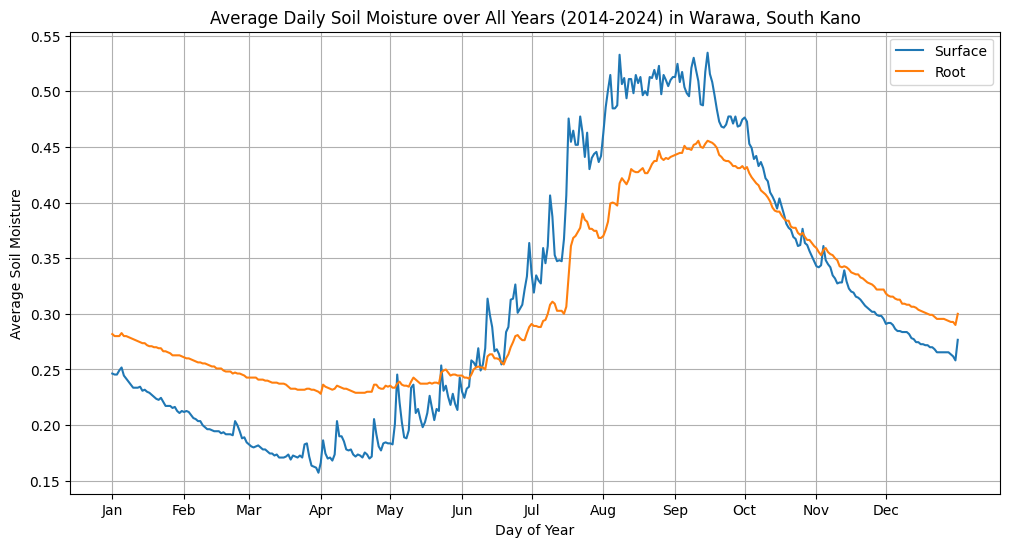

In [ ]:
# time series plot of soil moisture where moisture on each day has been averaged out over all the years

import pandas as pd
import matplotlib.pyplot as plt
# Calculate the average soil moisture for each day of the year across all years for each soil moisture type
daily_avg_surface = df.groupby(df['Date'].dt.dayofyear)['Surface_Soil_Wetness_(1)'].mean()
daily_avg_root = df.groupby(df['Date'].dt.dayofyear)['Root_Zone_Soil_Wetness_(1)'].mean()
#daily_avg_profile = warawa_df.groupby(warawa_df['Date'].dt.dayofyear)['Profile_Soil_Moisture_(1)'].mean()

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_surface.index, daily_avg_surface.values, label='Surface')
plt.plot(daily_avg_root.index, daily_avg_root.values, label='Root')
#plt.plot(daily_avg_profile.index, daily_avg_profile.values, label='Profile')
plt.xlabel('Day of Year')
plt.ylabel('Average Soil Moisture')
plt.title('Average Daily Soil Moisture over All Years (2014-2024) in Warawa, South Kano')
plt.grid(True)
plt.legend()

# Customize x-axis ticks to show months
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]  # Approximate days for each month start
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_ticks, month_labels)

plt.show()

Highlighting periods of optimal surface wetness (0.3-0.5)

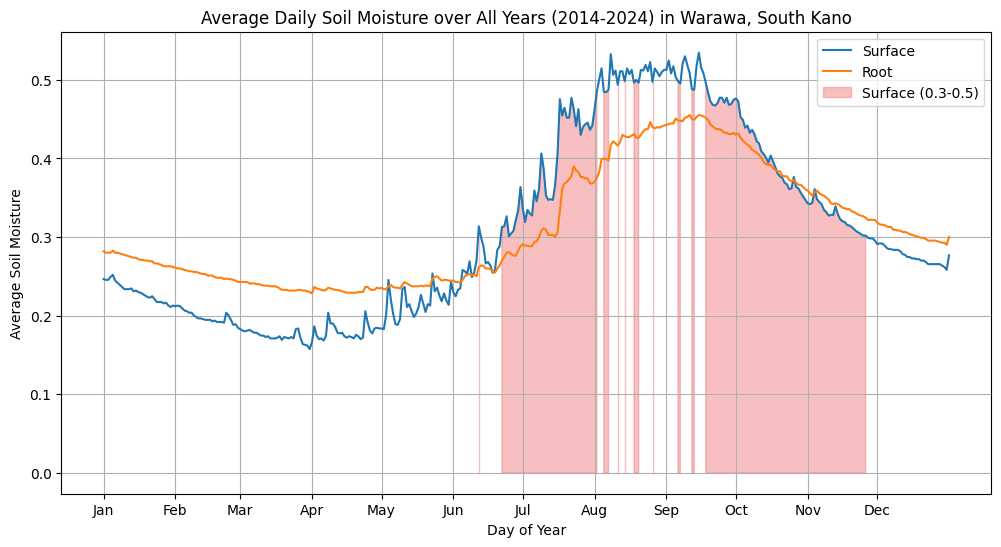

In [ ]:
import matplotlib.pyplot as plt

# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_surface.index, daily_avg_surface.values, label='Surface')
plt.plot(daily_avg_root.index, daily_avg_root.values, label='Root')

# Highlight daily_avg_surface values between 0.3 and 0.5
plt.fill_between(daily_avg_surface.index, daily_avg_surface.values, where=(daily_avg_surface >= 0.3) & (daily_avg_surface <= 0.5), color='lightcoral', alpha=0.5, label='Surface (0.3-0.5)')

plt.xlabel('Day of Year')
plt.ylabel('Average Soil Moisture')
plt.title('Average Daily Soil Moisture over All Years (2014-2024) in Warawa, South Kano')
plt.grid(True)
plt.legend()

# Customize x-axis ticks to show months
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]  # Approximate days for each month start
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(month_ticks, month_labels)

plt.show()


##Combinging Soil Moisture and Precipitation Categorisation to assess Planting Readiness Index

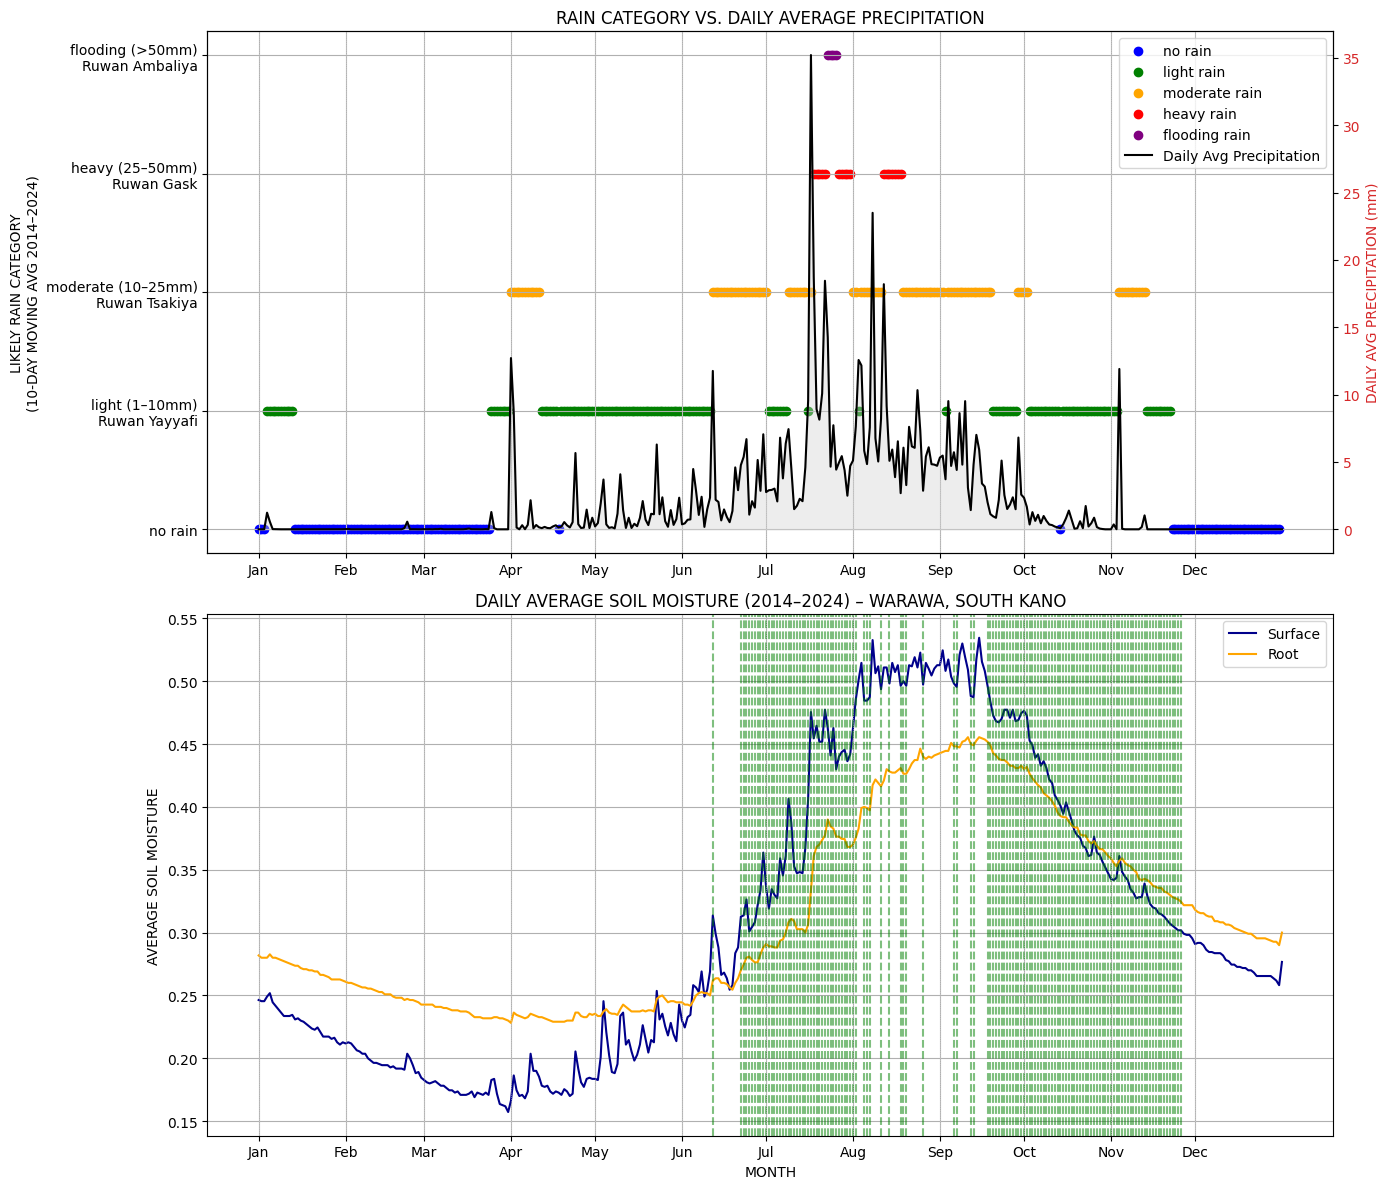

In [ ]:
import matplotlib.pyplot as plt

# Create the figure
fig = plt.figure(figsize=(14, 12))

# --- Plot 1: Rain Category + Precipitation ---
ax1 = fig.add_subplot(2, 1, 1)

colors = {'no rain': 'blue', 'light rain': 'green', 'moderate rain': 'orange', 'heavy rain': 'red', 'flooding rain': 'purple'}

for day, category in rain_series.items():
    y_value = {'no rain': 0, 'light rain': 1, 'moderate rain': 2,
               'heavy rain': 3, 'flooding rain': 4}.get(category, 0)
    ax1.scatter(day, y_value, color=colors[category],
                label=category if category not in [x.get_label() for x in ax1.get_legend_handles_labels()[0]] else '_nolegend_')

ax1.set_ylabel('LIKELY RAIN CATEGORY\n(10-DAY MOVING AVG 2014–2024)')
ax1.set_title('RAIN CATEGORY VS. DAILY AVERAGE PRECIPITATION')
ax1.set_yticks([0, 1, 2, 3, 4], ['no rain', 'light (1–10mm)\nRuwan Yayyafi',
                                 'moderate (10–25mm)\nRuwan Tsakiya',
                                 'heavy (25–50mm)\nRuwan Gask',
                                 'flooding (>50mm)\nRuwan Ambaliya'])
ax1.grid(True)

# Precipitation line
ax2 = ax1.twinx()
daily_avg_precip = df.groupby(df['Date'].dt.dayofyear)['Precipitation_Corrected_(mm/day)'].mean()
line1, = ax2.plot(daily_avg_precip.index, daily_avg_precip.values, color='black', label='Daily Avg Precipitation')
ax2.fill_between(daily_avg_precip.index, daily_avg_precip.values, color='lightgrey', alpha=0.4)
ax2.set_ylabel('DAILY AVG PRECIPITATION (mm)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(handles1 + [line1], labels1 + ['Daily Avg Precipitation'], loc='upper right', frameon=True)

# Month ticks and labels for x-axis
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.set_xticks(month_ticks)
ax1.set_xticklabels(month_labels)

# --- Plot 2: Soil Moisture ---
ax3 = fig.add_subplot(2, 1, 2)

# Plot soil moisture
ax3.plot(daily_avg_surface.index, daily_avg_surface.values, label='Surface', color='darkblue')
ax3.plot(daily_avg_root.index, daily_avg_root.values, label='Root', color = 'orange')

# Highlight zone 0.3–0.5
highlight_indices = daily_avg_surface[(daily_avg_surface >= 0.3) & (daily_avg_surface <= 0.5)].index
for index in highlight_indices:
    ax3.axvline(x=index, color='green', linestyle='--', alpha=0.5)

ax3.set_ylabel('AVERAGE SOIL MOISTURE')
ax3.set_xlabel('MONTH')
ax3.set_title('DAILY AVERAGE SOIL MOISTURE (2014–2024) – WARAWA, SOUTH KANO')
ax3.grid(True)
ax3.legend()

# Apply month labels to second plot as well
ax3.set_xticks(month_ticks)
ax3.set_xticklabels(month_labels)

# Vertical gridlines for months (optional)
for tick in month_ticks:
    ax1.axvline(x=tick, color='lightgrey', linestyle=':', linewidth=0.5)
    ax3.axvline(x=tick, color='lightgrey', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()


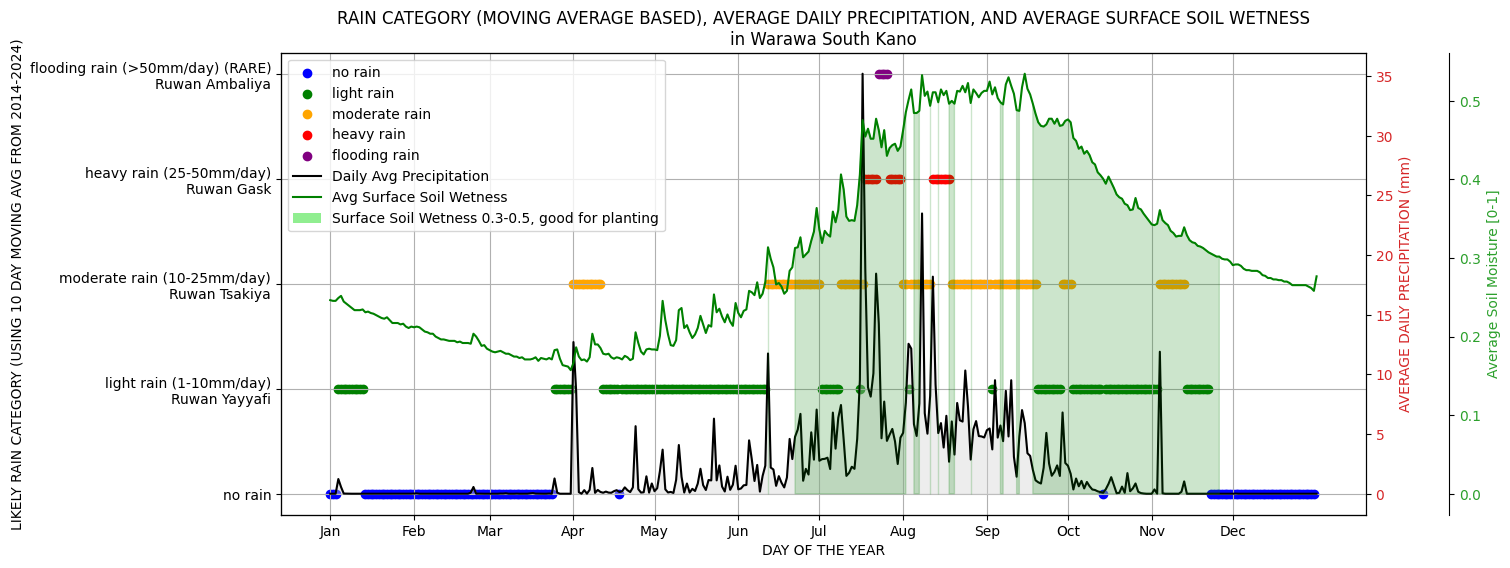

In [ ]:
# in the plot of daily_avg_surface and daily_avg_root, add highlights till the top where daily_avg_surfac is in the range [0.3,0.5] and add highlight to legend

import pandas as pd
import folium
import matplotlib.pyplot as plt
# ... (Your existing code) ...

fig, ax1 = plt.subplots(figsize=(14, 6))

# Define colors for different rain categories
colors = {'no rain': 'blue', 'light rain': 'green', 'moderate rain': 'orange', 'heavy rain': 'red', 'flooding rain': 'purple'}

# Plot rain categories as scatter points
for day, category in rain_series.items():
    y_value = 0  # Default y-value for 'no rain'
    if category == 'light rain':
        y_value = 1
    elif category == 'moderate rain':
        y_value = 2
    elif category == 'heavy rain':
        y_value = 3
    elif category == 'flooding rain':
        y_value = 4
    plt.scatter(day, y_value, color=colors[category],
                label=category if category not in [x.get_label() for x in plt.gca().get_legend_handles_labels()[0]] else '_nolegend_')

ax1.set_xlabel('DAY OF THE YEAR')
ax1.set_ylabel('LIKELY RAIN CATEGORY (USING 10 DAY MOVING AVG FROM 2014-2024)')
ax1.set_title('RAIN CATEGORY (MOVING AVERAGE BASED), AVERAGE DAILY PRECIPITATION, AND AVERAGE SURFACE SOIL WETNESS\nin Warawa South Kano')
ax1.set_xticks(range(0, 367, 30))
ax1.set_yticks([0,1,2,3,4], ['no rain', 'light rain (1-10mm/day)\nRuwan Yayyafi',
                             'moderate rain (10-25mm/day)\nRuwan Tsakiya',
                             'heavy rain (25-50mm/day)\nRuwan Gask',
                             'flooding rain (>50mm/day) (RARE)\nRuwan Ambaliya'])
ax1.grid(True)

# Group data by day of year and calculate the mean precipitation
daily_avg_precip = df.groupby(df['Date'].dt.dayofyear)['Precipitation_Corrected_(mm/day)'].mean()

# Create a second y-axis for daily precipitation values
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('AVERAGE DAILY PRECIPITATION (mm)', color=color)
line1, = ax2.plot(daily_avg_precip.index, daily_avg_precip.values, color='black', label='Daily Avg Precipitation')
ax2.fill_between(daily_avg_precip.index, daily_avg_precip.values, color='lightgrey', alpha=0.4)
ax2.tick_params(axis='y', labelcolor=color)


# Calculate the average soil moisture for each day of the year across all years for each soil moisture type
daily_avg_surface = df.groupby(df['Date'].dt.dayofyear)['Surface_Soil_Wetness_(1)'].mean()
daily_avg_root = df.groupby(df['Date'].dt.dayofyear)['Root_Zone_Soil_Wetness_(1)'].mean()

# Create the time series plot
ax3 = ax1.twinx()
color = 'tab:green'
ax3.set_ylabel('Average Soil Moisture [0-1]', color=color)
line2, = ax3.plot(daily_avg_surface.index, daily_avg_surface.values, color='green', label='Surface')
#line3, = ax3.plot(daily_avg_root.index, daily_avg_root.values, color='', label='Root')
ax3.spines['right'].set_position(('outward', 60))
ax3.tick_params(axis='y', labelcolor=color)


# Highlight area where daily_avg_surface is in the range [0.3, 0.5]
ax3.fill_between(daily_avg_surface.index, daily_avg_surface.values, where=(daily_avg_surface >= 0.3) & (daily_avg_surface <= 0.5), color='green', alpha=0.2
                 , label='Highlight (0.3-0.5)')



# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()

ax1.legend(handles1 + [line1] + [line2]  + [plt.Rectangle((0, 0), 1, 1, fc='lightgreen')], #+ [line3]
           labels1 + ['Daily Avg Precipitation'] + ['Avg Surface Soil Wetness'] + ['Surface Soil Wetness 0.3-0.5, good for planting'], #+ ['Root']
           loc='upper left', frameon=True)

# Customize x-axis to show months
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.set_xticks(month_ticks)
ax1.set_xticklabels(month_labels)

plt.show()


'To bridge technical predictions with practical decisions, he suggests introducing a Planting Readiness Index, a five-level scale that integrates rainfall and soil moisture data:

1.	Not Ready – dry soil, no rainfall trend
2.	Watch – initial signs, soil starting to moisten
3.	Prepare – improving conditions, ready seeds
4.	Plant – optimal soil moisture and rainfall conditions
5.	Caution – potential risks due to excessive wetness or forecasted dry spells'

<br>

Based on the above index and based on the soil moisture and precipitation levels in the charts above, we can broadly categorise the months as follows:

- Jan - 1 (not ready)
- Feb - 1 (not ready)
- Mar - 1 (not ready)
- Apr - 2 (watch)
- May - 2/3 (watch/prepare)
- Jun - 3/4 (prepare/plant)
- Jul - 4 (plant)
- Aug - 4 (plant)
- Sep - 4 (plant)
- Oct - not sure
- Nov - not sure
- Dec - 1 (not ready)

In [ ]:
df.columns

Index(['Unnamed: 0', 'LGA Name', 'Sub-Region', 'Latitude', 'Longitude', 'Date',
       'YEAR', 'DOY', 'Temperature_at_2_Meters_Average_(C)',
       'Temperature_at_2_Meters_Maximum_(C)',
       'Temperature_at_2_Meters_Minimum_(C)',
       'Relative_Humidity_at_2_Meters_(%)', 'Precipitation_Corrected_(mm/day)',
       'Wind_Speed_at_2_Meters_Average_(m/s)',
       'Wind_Speed_at_2_Meters_Maximum_(m/s)',
       'Wind_Speed_at_2_Meters_Minimum_(m/s)',
       'Wind_Direction_at_2_Meters_(Degrees)', 'Surface_Soil_Wetness_(1)',
       'Root_Zone_Soil_Wetness_(1)', 'Profile_Soil_Moisture_(1)',
       'Precipitation_MA_10', 'Shower Category'],
      dtype='object')

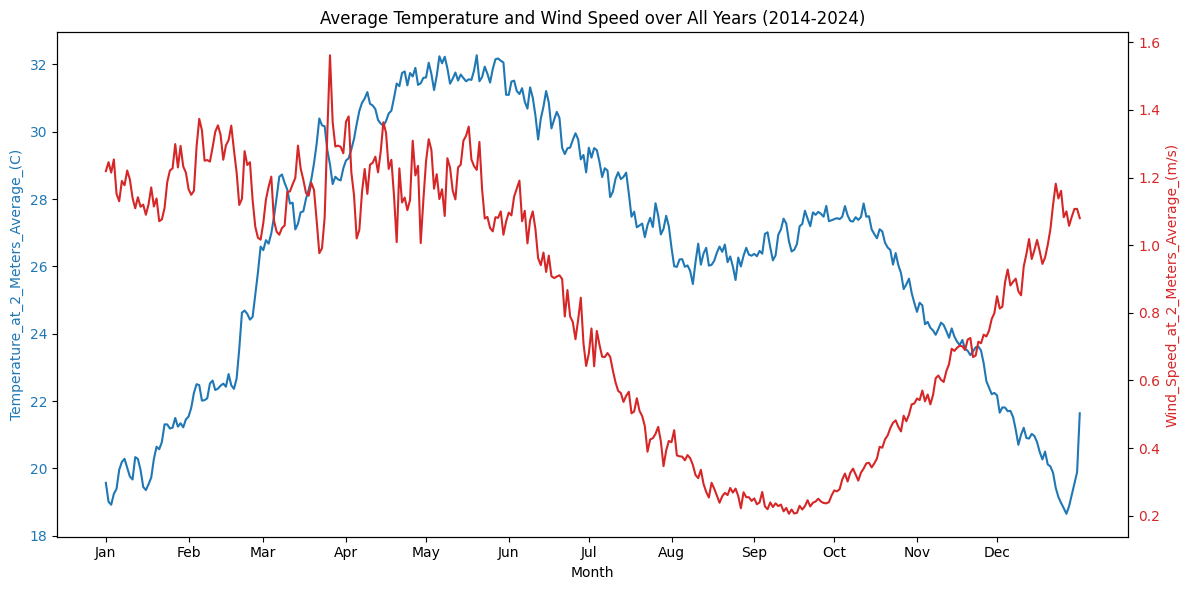

In [ ]:
# chart showing values of 'Temperature_at_2_Meters_Average_(C)' on one side of y axis and 'Wind_Speed_at_2_Meters_Average_(m/s)' on the other side of y axis, averaged out over all years,

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Temperature_at_2_Meters_Average_(C) on the left y-axis
color = 'tab:blue'
ax1.set_ylabel('Temperature_at_2_Meters_Average_(C)', color=color)
ax1.plot(df.groupby(df['Date'].dt.dayofyear)['Temperature_at_2_Meters_Average_(C)'].mean().index,
         df.groupby(df['Date'].dt.dayofyear)['Temperature_at_2_Meters_Average_(C)'].mean().values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Wind_Speed_at_2_Meters_Average_(m/s)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Wind_Speed_at_2_Meters_Average_(m/s)', color=color)
ax2.plot(df.groupby(df['Date'].dt.dayofyear)['Wind_Speed_at_2_Meters_Average_(m/s)'].mean().index,
         df.groupby(df['Date'].dt.dayofyear)['Wind_Speed_at_2_Meters_Average_(m/s)'].mean().values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Customize x-axis to show months
month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.set_xticks(month_ticks)
ax1.set_xticklabels(month_labels)

ax1.set_xlabel('Month')
ax1.set_title('Average Temperature and Wind Speed over All Years (2014-2024)')
fig.tight_layout()
plt.show()


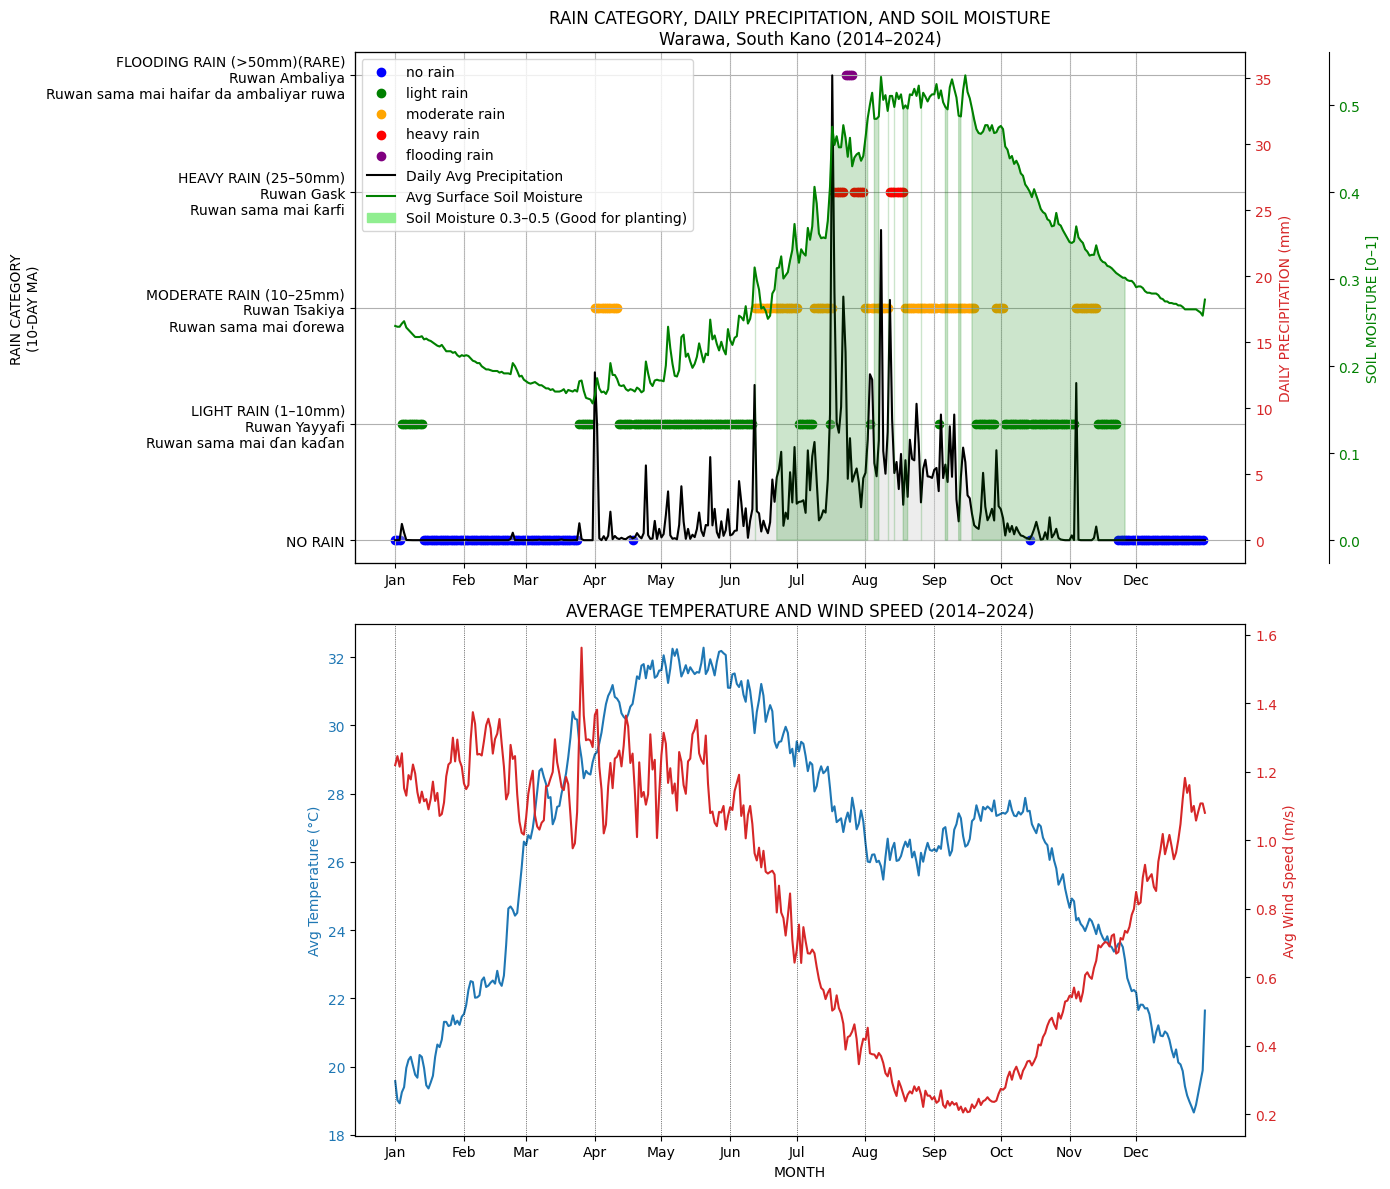

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, (top_ax, bottom_ax) = plt.subplots(2, 1, figsize=(14, 12))

# ========== TOP PLOT: Rain Category, Precipitation, and Soil Moisture ==========

# Rain category scatter
colors = {'no rain': 'blue', 'light rain': 'green', 'moderate rain': 'orange', 'heavy rain': 'red', 'flooding rain': 'purple'}

for day, category in rain_series.items():
    y_value = {'no rain': 0, 'light rain': 1, 'moderate rain': 2, 'heavy rain': 3, 'flooding rain': 4}.get(category, 0)
    top_ax.scatter(day, y_value, color=colors[category],
                   label=category if category not in [x.get_label() for x in top_ax.get_legend_handles_labels()[0]] else '_nolegend_')

top_ax.set_ylabel('RAIN CATEGORY\n(10-DAY MA)')
top_ax.set_title('RAIN CATEGORY, DAILY PRECIPITATION, AND SOIL MOISTURE\nWarawa, South Kano (2014–2024)')
top_ax.set_yticks([0, 1, 2, 3, 4], ['NO RAIN', 'LIGHT RAIN (1–10mm)\nRuwan Yayyafi\nRuwan sama mai ɗan kaɗan', 'MODERATE RAIN (10–25mm)\nRuwan Tsakiya\nRuwan sama mai ɗorewa', 'HEAVY RAIN (25–50mm)\nRuwan Gask\nRuwan sama mai ƙarfi', 'FLOODING RAIN (>50mm)(RARE)\nRuwan Ambaliya\nRuwan sama mai haifar da ambaliyar ruwa'])
top_ax.grid(True)

# Daily average precipitation (second y-axis)
ax2 = top_ax.twinx()
daily_avg_precip = df.groupby(df['Date'].dt.dayofyear)['Precipitation_Corrected_(mm/day)'].mean()
line1, = ax2.plot(daily_avg_precip.index, daily_avg_precip.values, color='black', label='Daily Avg Precipitation')
ax2.fill_between(daily_avg_precip.index, daily_avg_precip.values, color='lightgrey', alpha=0.4)
ax2.set_ylabel('DAILY PRECIPITATION (mm)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Soil moisture (third y-axis)
ax3 = top_ax.twinx()
daily_avg_surface = df.groupby(df['Date'].dt.dayofyear)['Surface_Soil_Wetness_(1)'].mean()
daily_avg_root = df.groupby(df['Date'].dt.dayofyear)['Root_Zone_Soil_Wetness_(1)'].mean()
line2, = ax3.plot(daily_avg_surface.index, daily_avg_surface.values, color='green', label='Surface Soil Moisture')
ax3.set_ylabel('SOIL MOISTURE [0–1]', color='green')
ax3.spines['right'].set_position(('outward', 60))
ax3.tick_params(axis='y', labelcolor='green')

# Highlight good planting range [0.3, 0.5]
ax3.fill_between(daily_avg_surface.index, daily_avg_surface.values, where=(daily_avg_surface >= 0.3) & (daily_avg_surface <= 0.5),
                 color='green', alpha=0.2, label='Surface Soil Moisture 0.3–0.5')

# Legends
handles1, labels1 = top_ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles3, labels3 = ax3.get_legend_handles_labels()

top_ax.legend(handles1 + [line1, line2, plt.Rectangle((0, 0), 1, 1, color='lightgreen')],
              labels1 + ['Daily Avg Precipitation', 'Avg Surface Soil Moisture', 'Soil Moisture 0.3–0.5 (Good for planting)'],
              loc='upper left', frameon=True)

# ========== BOTTOM PLOT: Temperature and Wind Speed ==========

# Temperature (left y-axis)
color = 'tab:blue'
bottom_ax.set_ylabel('Avg Temperature (°C)', color=color)
temp_series = df.groupby(df['Date'].dt.dayofyear)['Temperature_at_2_Meters_Average_(C)'].mean()
bottom_ax.plot(temp_series.index, temp_series.values, color=color)
bottom_ax.tick_params(axis='y', labelcolor=color)

# Wind speed (right y-axis)
ax4 = bottom_ax.twinx()
color = 'tab:red'
wind_series = df.groupby(df['Date'].dt.dayofyear)['Wind_Speed_at_2_Meters_Average_(m/s)'].mean()
ax4.set_ylabel('Avg Wind Speed (m/s)', color=color)
ax4.plot(wind_series.index, wind_series.values, color=color)
ax4.tick_params(axis='y', labelcolor=color)

bottom_ax.set_title('AVERAGE TEMPERATURE AND WIND SPEED (2014–2024)')
bottom_ax.set_xlabel('MONTH')

# ========== Shared X-Axis Formatting ==========

month_ticks = [1, 32, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for ax in [top_ax, bottom_ax]:
    ax.set_xticks(month_ticks)
    ax.set_xticklabels(month_labels)

for tick in month_ticks:
    top_ax.axvline(x=tick, color='lightgrey', linestyle=':', linewidth=0.5)
    bottom_ax.axvline(x=tick, color='black', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()


**Chart Interpretation**

1. Rain Category, Precipitation, and Soil Moisture (Top Plot)
Rainfall Trends:

- In the chart, the daily avg precipitation indicates the amount of rain that is expected or likely (based on historical data), while the rain categories roughly indicate the upper limit of how much rain is possible based on past moving average patterns.

- The majority of significant rainfall events (moderate to heavy rain, >10 mm/day) are concentrated between late May and mid-September, peaking between July and August. Isolated light rains appear sporadically from March onward but are not sustained enough to support planting.

- Surface Soil Moisture:
Soil moisture begins to rise steadily in May, crosses the critical 0.3 threshold by late June, and remains in the optimal 0.3–0.5 range until late November, as has been highlighted in green. This corresponds well with the main rainy season.

- Correlation:
Periods of higher precipitation align with peaks in soil moisture, affirming Mr. Aliyu’s suggestion that rainfall alone is not a reliable signal—soil moisture better reflects readiness for planting.

2. Temperature and Wind Speed (Bottom Plot)
Temperature:

- Average temperatures remain above 28°C from March through June, which supports germination for most crops. However, during peak rainfall (July–September), temperatures drop slightly but stay within a suitable range.

- Wind Speed:
Wind speeds are lowest during the rainy season, reducing the risk of desiccation or physical damage to young crops.

<br>
<br>

**Recommendations for Farmers (Based on Mr. Abubakar’s Framework)**

<br>

1. Best Planting Window:

The optimal planting window is likely from mid-June to late August, when -

- Surface soil moisture is consistently in the 0.3–0.5 range

- Sustained moderate to heavy rainfall has begun

- Temperature remains supportive of germination and early growth

<br>

2. Use the Planting Readiness Index (PRI):

- Not Ready (Jan – March): Dry soil, scattered light showers, low moisture

- Watch (April – May): Initial rainfall, soil begins moistening

- Prepare (May - June): Soil enters 0.3 range; rainfall becoming more consistent

- Plant (June - August): Ideal moisture, consistent rain, suitable temperature

- Caution (October - November): Moisture still high, but rainfall starts declining; risk of dry spell

<br>

3. Avoid Early False Starts:

Isolated showers in April–May, despite increasing temperatures, should not trigger planting. Wait for sustained rainfall and soil moisture above 0.3, to avoid replanting costs.

<br>

4. Monitoring Strategy:

Farmers can track 10-day cumulative rainfall (targeting ≥25 mm over 3 consecutive days) and soil moisture readings to determine planting readiness.
Visual cues like digging and checking the feel of soil at 5–10 cm depth still align with this model.

**Interpretation Summary of Holt-Winters Model Components with Residuals:**

<br>

1. Original vs. Fitted:

The fitted line closely follows the original temperature series, indicating that the Holt-Winters model has accurately captured the underlying patterns in the data. The alignment suggests strong model performance in replicating observed temperature values.

<br>

2. Level (Baseline Temperature):

The level component shows the smoothed base temperature over time after removing seasonal and trend effects. It remains within a reasonable range of approximately 25–30°C with some fluctuations, reflecting short-term shifts in the central tendency of temperature.

<br>

3. Trend Component:

The trend is nearly flat and very small in magnitude, indicating that the model detects no significant long-term warming or cooling trend across the observed time span. The temperature series appears relatively stable in terms of directional change.

If we look closely, we can see a value of ~0.00037, which means the model believes the temperature increases very very slightly each day. This line shows the daily rate of change in the level — it's the slope of the trend.

<br>

4. Seasonality Component:

The seasonal pattern exhibits a clear and regular yearly cycle, ranging from approximately –5.5°C to +5.5°C. This reflects predictable annual temperature fluctuations, with peaks and troughs corresponding to warm and cool months, respectively.

<br>

5. Model Residuals (Original – Fitted):

The residuals are centered around zero with no clear trend, showing that the model errors are randomly distributed. This supports the assumption that the model has captured the systematic components (trend and seasonality) well. The magnitude of most residuals stays within ±2.5°C, which is acceptable for temperature modeling.

<br>

Overall Assessment:

The Holt-Winters model provides a good fit for the temperature data, effectively modeling both the seasonal structure and the overall baseline. The residual plot confirms that most of the structure in the data has been accounted for, making the model suitable for forecasting.